In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d
from scipy.integrate import dblquad, quad, simpson

#import autograd.numpy as np
#from autograd import grad
import numdifftools as nd

 - https://math.stackexchange.com/questions/2099318/determine-the-surface-of-a-cardioid

In [2]:
a = 2.

In [3]:
def f(t, a=1.):
    return np.array([
        a * np.cos(t),
        a * np.sin(t)
    ])

In [4]:
t = np.linspace(0, 2 * np.pi, 201)

In [5]:
x, y = f(t, a=a)

In [6]:
fx = interp1d(t, x, fill_value=x[0], bounds_error=False, kind='cubic')
fy = interp1d(t, y, fill_value=y[0], bounds_error=False, kind='cubic')

In [7]:
def integrand(t):
    return fx(t)*nd.Derivative(fy)(t)

In [8]:
I = quad(integrand, t.min(), t.max())
I

(12.56637079139576, 1.0850560402992373e-07)

In [9]:
A = a**2 * np.pi
A

12.566370614359172

In [10]:
I[0] - A

1.7703658805601208e-07

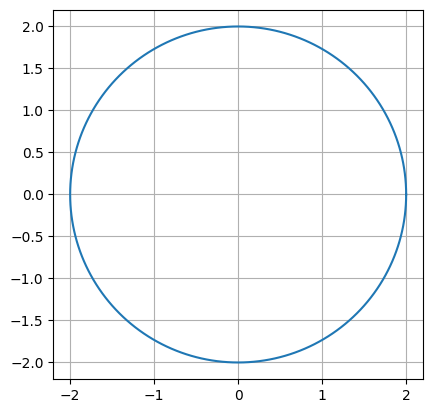

In [11]:
fig, axe = plt.subplots()
axe.plot(x, y)
axe.set_aspect("equal")
axe.grid()